In [ ]:
# import part
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data
from pylab import plt
import yfinance as yf
yf.pdr_override()

In [ ]:
df = data.get_data_yahoo(tickers='^HSI',start='2012-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Input variables and output variables were screened
X = df[['Open', 'High', 'Low', 'Close']]
y = df['Volume']

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression models were created and fitted to the training data
model = LinearRegression()
model.fit(X_train, y_train)
newdate=df.index
train_data_len=len(X_train)
x_date=newdate[train_data_len:]
# Predictions were made and the mean square error was calculated
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
y_pred_discrete = np.round(y_pred)
# accuracy = accuracy_score(y_test, y_pred_discrete)
# Output the mean squared error
print('均方误差：', mse)

accuracy = 0.
for i in range(len(y_pred)):
  # accuracy += abs(d[i]-test_predict[i])
     accuracy += (y_test[i]-abs(y_test[i]-y_pred[i]))/y_test[i]
accuracy=accuracy/len(y_pred)
print('accuracy:', accuracy)

均方误差： 3.331488524516076e+17
accuracy: -inf


<ipython-input-21-0d1c12c56cc6>:23: RuntimeWarning: divide by zero encountered in double_scalars
  accuracy += (y_test[i]-abs(y_test[i]-y_pred[i]))/y_test[i]


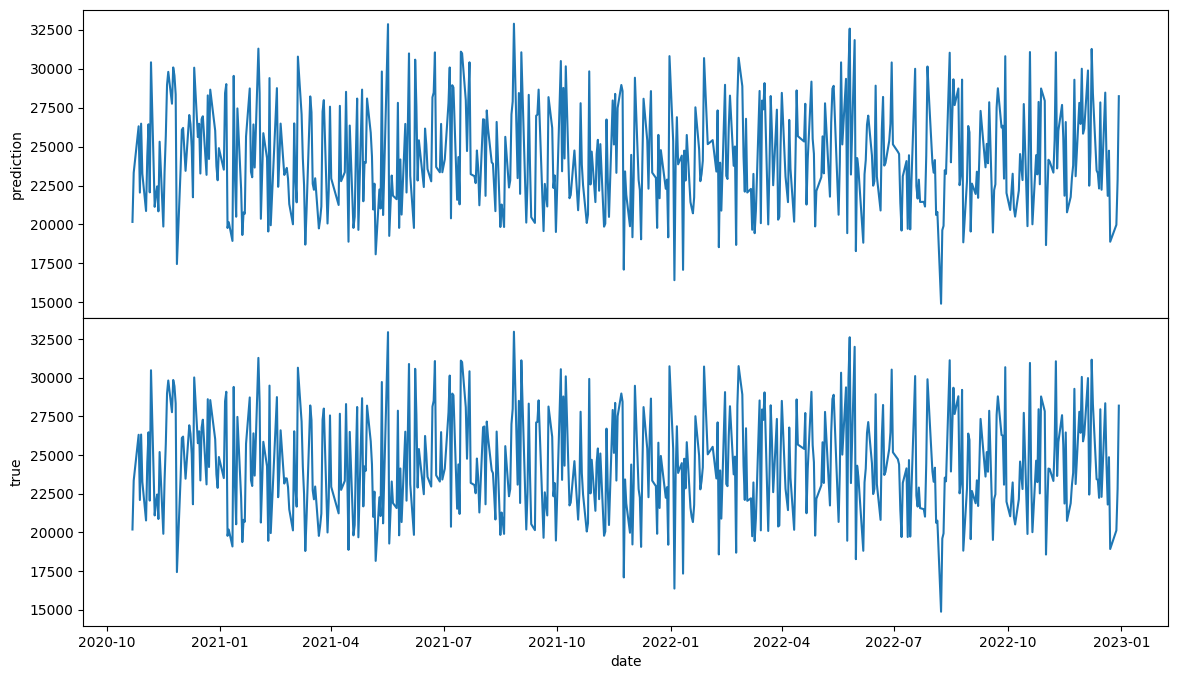

In [ ]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(14,8))
axs[0].plot(x_date,y_pred)
axs[0].set_ylabel("prediction")
axs[1].plot(x_date,y_test)
axs[1].set_ylabel("true")
plt.subplots_adjust(hspace=0)
plt.xlabel('date')
plt.show()
plt.close()